# Practica 2 - Exploración de grafos de estado

## Ejercicio 1

Usted tiene 2 jarras, una con capacidad de 3 litros y otra con capacidad de 5 litros. Además, se cuenta con un grifo. Las jarras se pueden llenar totalmente, vaciar en el piso y vaciar parcialmente el contenido de una jarra en la otra. Las jarras no tienen ninguna clase de marca. El objetivo es medir exactamente un litro de agua

### 1. ¿Cuáles son los estados del problema?

Los estados del problema se pueden definir de acuerdo a la cantidad de agua en cada jarra. En este escenario, definiremos que cada estado es una variación de un litro en cada una de las jarras. Definiendo la jarra de capacidad 3 como $J_3$ y la jarra de capacidad 5 como $J_5$, tenemos el siguiente espacio de opciones:

$$J_5 = \{0,1,2,3,4,5\}$$
$$J_3 = \{0,1,2,3\}$$

Para definir entonces cuales son los estados del problema, solo debemos hacer un producto cartesiano entre los espacios de opciones de cada jarra

$$E = J_3 \times J_5$$

Donde $E$ representa el espacio de estados

### 2. ¿Cuál es el tamaño del espacio de estados?

El tamaño del espacio del espacio de estados se calcula con la cardinalidad de $E$, como este es el producto cartesiano de dos conjuntos, para calcular su tamaño podemos sencillamente hallar el producto de la cardinalidad de los conjuntos que lo componen. Es decir:

$$|E| = |J_3 \times J_5| = |J_3| \cdot |J_5| = 4 \cdot 6 = 24$$

Con esto, podemos concluir que nuestro espacio tiene un total de 24 estados distintos

### 3. ¿Cuáles son las acciones?

Las acciones se pueden resumir en llenar las jarrad, intercambiar contenido entre estas y vaciar las jarras. Siendo más precisos, las acciones que se tienen son:

* Llenar la jarra de 5 litros.
* Llenar la jarra de 3 litros.
* Pasar el contenido de la jarra de 3 litros a la jarra de 5 litros.
* Pasar el contenido de la jarra de 5 litros a la jarra de 3 litros.
* Vaciar la jarra de 3 litros.
* Vaciar la jarra de 5 litros.

### 4. ¿Cuál podría ser el costo de una acción?

El costo de cada acción podría ser de acuerdo a lo que nos interese medir a largo plazo. Podemos tomar dos ejemplos, siendo el primero buscar una solución con un mínimo de acciones y siendo el segundo, aquel en el que se utilice una menor cantidad de agua. Para ello teniamos el siguiente esquema de costos en cada escenario:

1. **Mínimo de acciones**: Todas las acciones tienen costo 1
2. **Mínimo uso de agua**: Las primeras dos acciones tienen de costo $C-L$ donde $C$ representas la capacidad máxima de la jarra a llenar y $L$ la cantidad de líquido en dicho momento.


### 5. Defina el test de objetivo.

El test objetivo esta definido por poder medir 1 litro en alguna de las jarras. Por consiguiente, se puede definir el objetivo $O$ como el poder alcanzar algun estado que cumpla lo siguiente:

$$O = \{(a,b) \in E : a = 1 \vee b = 1 \}$$

### 6. Dado un estado inicial correspondiente a las dos jarras vacías, encuentre una solución al problema.

Para este ejercicio, vamos a diseñar el grafo completo (Dado que no tiene tantos estados), para poder identificar los estados inaccesibles del problema. Posteriormente, se hará una busqueda en anchura sobre el grafo para encontrar una solución al problema.

In [19]:
def getSuccessors(e):
    j3,j5 = e
    r = set()
    #Swap content
    toSwapJ3toJ5 = min(5-j5,j3)
    toSwapJ5toJ3 = min(3-j3,j5)
    r.add((j3 - toSwapJ3toJ5,j5 + toSwapJ3toJ5))
    r.add((j3 + toSwapJ5toJ3,j5 - toSwapJ5toJ3))
    #Fill jars
    r.add((j3,5))
    r.add((3,j5))
    #Empty jars
    r.add((j3,0))
    r.add((0,j5))
    #Avoid cycles
    if e in r: r.remove(e)
    return r

def isObjective(e):
    j3,j5 = e
    return j3==1 or j5==1

def buildGraph():
    g = {}
    for i in range(5):
        for j in range(3):
            g[(j,i)] = getSuccessors((j,i))
    return g

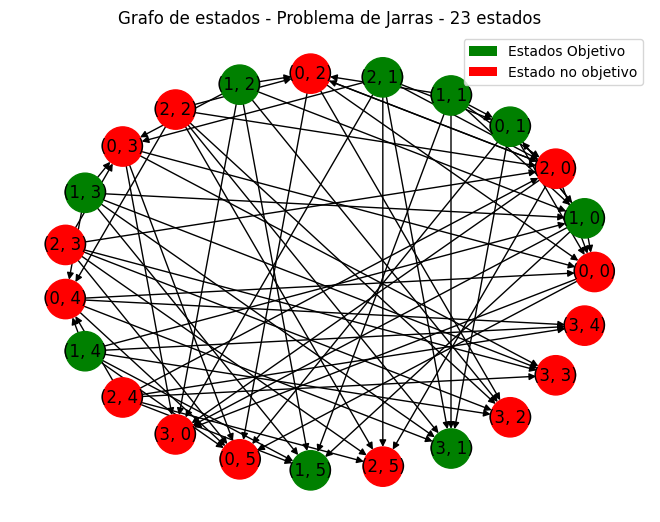

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

g = buildGraph()
G = nx.DiGraph(g)
pos = nx.circular_layout(G)
node_colors = ['green' if isObjective(e) else 'red' for e in G.nodes()]
nx.draw(G,pos,with_labels=True, node_size = 800, node_color = node_colors)

legend = [Patch(facecolor='green', label = 'Estados Objetivo'),
          Patch(facecolor='red', label = 'Estado no objetivo')]
plt.legend(handles = legend, loc='upper right')
plt.title(f'Grafo de estados - Problema de Jarras - {len(G.nodes())} estados')
plt.show()

Podemos ver que hay muchos arcos en el grafo y es dificil identificar cuales son accesibles y cual es no desde el estado inicial (0,0). Para identificar que nodos son accesibles o no desde nuestro estado inicial, se realizará una búsqueda en anchura.